In [2]:
import math
import collections
import urllib.request

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

from scipy.stats import linregress
%matplotlib inline

In [3]:
header = pd.read_csv('..\Original_Files\Dataset\data_files\logs-headers.csv')

In [140]:
header = header.values.flatten().tolist()

In [5]:
log = pd.read_csv('..\Original_Files\Dataset\data_files\logs.csv', low_memory=False)

In [6]:
pd.options.display.max_columns = 134
log.head()

,row_id,player_id,school,wave,session,date,event_id,event_description,event_category,event_time,event_time_dbl,stack_id,stack_title,data_headers,data_values,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_id,minigame_level,skill_id,old_skill_point,new_skill_point,object_id,object_locked,object_first_time_unlocked,pan_scene_start_left,pan_scene_end_left,scan_start_point,scan_end_point,sense_id,object_scan_result,animatic_id,animatic_time_elapsed,animatic_time_left,avatar_age,avatar_gender,avatar_name,avatar_id,name_of_file,event_type,aa_level_id,chunk_id,piece_id,old_choice_id,old_label,choice_id,new_choice_id,new_label,stars_for_this_level_old,stars_for_this_level_new,npc_id,npc_fact_data_type,previous_rank_id,new_rank_id,invitation_id,inviting_npc_id,inviting_npc_rank_id,chosen_response,points_lost_gained,strike,total_points,total_strikes,missed_safe_invitations,accepted_unsafe_invitations,priority_type,card_id,opportunity_card_id,stop_think_id,priority_type_2,resulting_priority_type,priority_protected_true_false,gaining_priority_type,amount_gained,losing_priority_type,amount_lost,goal_1_priority_type,goal1_amount,goal1_achieved_amount,goal_2_priority_type,goal2_amount,goal2_achieved_amount,draws_remaining,starter_statement_id,validity,cred_lost_gained,fact_card_id,chosen_fact_card_id,opponent_its_on_statement_id,players_chosen_response_id,player_won,players_cred_total,item_locked_unlocked_states,proportion_complete,starting_screen_pan_position_x,starting_screen_pan_position_y,starting_screen_pan_position_w,starting_screen_pan_position_h,ending_screen_pan_position_x,ending_screen_pan_position_y,ending_screen_pan_position_w,ending_screen_pan_position_h,real_date_time,json_gamestate_dump,intention_id,answer_validity,influence_id,influence_id1,clip1_validity,influence_id2,clip2_validity,influence_id3,clip3_validity,opponent_attack_id,chosen_opponent_attack_type_id,player_point_loss,strategy_id,strategy_strength,piece_id_2,piece1_id,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
0,1,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,198,NaN,NaN,age selected,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,199,NaN,NaN,gender selected,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6427001,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,205,NaN,NaN,"age selected, gender selected","2,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Male,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# import the response variate
response = pd.read_csv('..\Original_Files\Dataset\data_files\S5_scores_cleaned.csv')

In [8]:
response = response.dropna().astype({'player_id':'int'})
response

,player_id,weeks,S5_mean
0,6427001,0,3.900
1,6427001,3,3.900
2,6427001,6,3.875
3,6427027,0,3.800
4,6427027,3,4.000
...,...,...,...
225,6608002,0,4.000
226,6608002,3,4.000
227,6608002,6,3.900
228,6608002,12,4.000


In [9]:
# by player
index_by_player = log.set_index(['player_id'])
index_by_player

,row_id,school,wave,session,date,event_id,event_description,event_category,event_time,event_time_dbl,stack_id,stack_title,data_headers,data_values,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_id,minigame_level,skill_id,old_skill_point,new_skill_point,object_id,object_locked,object_first_time_unlocked,pan_scene_start_left,pan_scene_end_left,scan_start_point,scan_end_point,sense_id,object_scan_result,animatic_id,animatic_time_elapsed,animatic_time_left,avatar_age,avatar_gender,avatar_name,avatar_id,name_of_file,event_type,aa_level_id,chunk_id,piece_id,old_choice_id,old_label,choice_id,new_choice_id,new_label,stars_for_this_level_old,stars_for_this_level_new,npc_id,npc_fact_data_type,previous_rank_id,new_rank_id,invitation_id,inviting_npc_id,inviting_npc_rank_id,chosen_response,points_lost_gained,strike,total_points,total_strikes,missed_safe_invitations,accepted_unsafe_invitations,priority_type,card_id,opportunity_card_id,stop_think_id,priority_type_2,resulting_priority_type,priority_protected_true_false,gaining_priority_type,amount_gained,losing_priority_type,amount_lost,goal_1_priority_type,goal1_amount,goal1_achieved_amount,goal_2_priority_type,goal2_amount,goal2_achieved_amount,draws_remaining,starter_statement_id,validity,cred_lost_gained,fact_card_id,chosen_fact_card_id,opponent_its_on_statement_id,players_chosen_response_id,player_won,players_cred_total,item_locked_unlocked_states,proportion_complete,starting_screen_pan_position_x,starting_screen_pan_position_y,starting_screen_pan_position_w,starting_screen_pan_position_h,ending_screen_pan_position_x,ending_screen_pan_position_y,ending_screen_pan_position_w,ending_screen_pan_position_h,real_date_time,json_gamestate_dump,intention_id,answer_validity,influence_id,influence_id1,clip1_validity,influence_id2,clip2_validity,influence_id3,clip3_validity,opponent_attack_id,chosen_opponent_attack_type_id,player_point_loss,strategy_id,strategy_strength,piece_id_2,piece1_id,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6427001,1,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,600,Player selects age,Avatar Creation,3M 18S,198,NaN,NaN,age selected,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6427001,2,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,601,Player selects gender,Avatar Creation,3M 19S,199,NaN,NaN,gender selected,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6427001,3,3561,"3561 (T,TH) Spring 2013",Session 1,2013-03-07,602,Player commits to age and gender,Avatar Creation,3M 25S,205,NaN,NaN,"age selected, gender selected","2,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Male,NaN,NaN,Session_1_eventLog_6427001_session1.log,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [10]:
index_by_player.index

Int64Index([ 6427001,  6427001,  6427001,  6427001,  6427001,  6427001,
             6427001,  6427001,  6427001,  6427001,
            ...
            65670032, 65670032, 65670032, 65670032, 65670032, 65670032,
            65670032, 65670032, 65670032, 65670032],
           dtype='int64', name='player_id', length=2106597)

In [11]:
response_index_by_player = response.set_index(['player_id'])
response_index_by_player

,weeks,S5_mean
player_id,,
6427001,0,3.900
6427001,3,3.900
6427001,6,3.875
6427027,0,3.800
6427027,3,4.000
...,...,...
6608002,0,4.000
6608002,3,4.000
6608002,6,3.900


In [12]:
id_rough = response_index_by_player.index.unique()
id_rough

Int64Index([6427001, 6427027, 6427030, 6427032, 6427034, 6427036, 6427037,
            6427038, 6427039, 6427040, 6427041, 6429001, 6430002, 6430003,
            6430004, 6430008, 6486001, 6486002, 6486003, 6486004, 6486005,
            6486009, 6486011, 6486013, 6486018, 6486019, 6486020, 6486023,
            6486025, 6486026, 6486029, 6486032, 6486033, 6486034, 6486038,
            6486039, 6486040, 6506008, 6506009, 6546001, 6546005, 6546006,
            6546008, 6546011, 6546014, 6566001, 6566003, 6567002, 6567003,
            6567005, 6606001, 6606002, 6606003, 6606004, 6606005, 6606006,
            6606011, 6607006, 6607007, 6607008, 6607009, 6607010, 6608002],
           dtype='int64', name='player_id')

In [13]:
ids = []
for ele in id_rough:
    if ele in index_by_player.index:
        ids.append(ele)
ids


[6427001,
 6427027,
 6427030,
 6427032,
 6427034,
 6427036,
 6427037,
 6427038,
 6427039,
 6427040,
 6427041,
 6429001,
 6430002,
 6430003,
 6430004,
 6430008,
 6486001,
 6486002,
 6486003,
 6486004,
 6486005,
 6486009,
 6486011,
 6486013,
 6486018,
 6486019,
 6486020,
 6486023,
 6486025,
 6486026,
 6486029,
 6486032,
 6486033,
 6486034,
 6486038,
 6486039,
 6486040,
 6506008,
 6506009,
 6546001,
 6546005,
 6546006,
 6546008,
 6546011,
 6566001,
 6566003,
 6567002,
 6567003,
 6606001,
 6606002,
 6606003,
 6606004,
 6606005,
 6606006,
 6606011,
 6607006,
 6607007,
 6607008,
 6607009,
 6607010,
 6608002]

In [14]:
for ele in id_rough:
    if ele not in index_by_player.index:
        print(ele)


6546014
6567005


In [16]:
max_skill_level_know = []
# find the maximum number
for i in ids:
    max_skill_level_know.append(np.nanmax(index_by_player.loc[i].skill_level_know))
max_skill_level_know

[30.0,
 6.0,
 8.0,
 0.0,
 6.0,
 17.0,
 15.0,
 7.0,
 12.0,
 29.0,
 14.0,
 3.0,
 29.0,
 30.0,
 6.0,
 0.0,
 27.0,
 29.0,
 26.0,
 29.0,
 29.0,
 26.0,
 3.0,
 7.0,
 28.0,
 20.0,
 25.0,
 27.0,
 25.0,
 19.0,
 29.0,
 22.0,
 21.0,
 21.0,
 26.0,
 24.0,
 22.0,
 26.0,
 7.0,
 22.0,
 15.0,
 20.0,
 9.0,
 14.0,
 14.0,
 13.0,
 18.0,
 29.0,
 3.0,
 3.0,
 21.0,
 23.0,
 23.0,
 7.0,
 2.0,
 22.0,
 6.0,
 13.0,
 0.0,
 26.0,
 26.0]

In [242]:
# find the max score
max_score = []
for i in ids:
    if isinstance(response_index_by_player.loc[i].S5_mean, float):
        max_score.append(0)
    else:
        max_score.append(response_index_by_player.loc[i].S5_mean.iloc[-1]-response_index_by_player.loc[i].S5_mean.iloc[0])

AttributeError: module 'numpy' has no attribute 'concat'

In [433]:
change_or_not = []
for score in max_score:
    if score < 0:
        change_or_not.append(-1)
    elif score == 0:
        change_or_not.append(0)
    else:
        change_or_not.append(1)
if_change = pd.DataFrame({'player_id': ids, 'change': change_or_not})

,change
player_id,
6427001,-1
6427027,-1
6427030,1
6427032,-1
6427034,0
...,...
6607007,0
6607008,0
6607009,0


In [221]:
twod = pd.DataFrame({'skill_level': max_skill_level_know,'score': max_score})
twod = twod.set_index('skill_level').sort_index()

In [222]:
twod

,score
skill_level,
0.0,-0.200
0.0,0.000
0.0,-0.100
2.0,-0.200
3.0,0.000
...,...
29.0,0.000
29.0,0.000
29.0,0.000


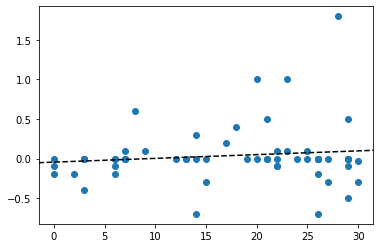

In [223]:
# plot skill_you_know vs. s5_cleaned (for last weekend)
pp.scatter(twod.index, twod.score)

reg = linregress(twod.index, twod.score)
pp.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--", color="k")

In [231]:
def plot_scatter(col):
    max1 = []
    for i in ids:
        max1.append(np.nanmax(index_by_player.loc[i][col]))
    
    twod = pd.DataFrame({'skill_level': max1,'score': max_score})
    twod = twod.set_index('skill_level').sort_index()

    # plot skill_you_know vs. s5_cleaned (for last weekend)
    pp.scatter(twod.index, twod.score, label='difference for ' + col)
    
    reg = linregress(twod.index, twod.score)
    pp.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--")
    
    pp.axis(xmin=0, xmax=30)

In [226]:
headers[15]

AttributeError: 'list' object has no attribute 'variable_names'

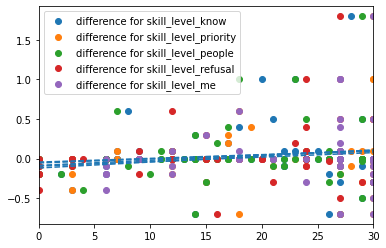

In [232]:
for col in header[15:20]:
    plot_scatter(col)
pp.legend()

In [24]:
index_by_player.loc[6427001].data_values.iloc[1]

'0'

In [25]:
gender = []
for i in ids:
    gender.append(index_by_player.loc[i].data_values.iloc[1])
gender

['0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '3',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '3',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1',
 '0',
 '0',
 '0',
 '1']

In [27]:
decrease = 0
total = 0
for i in id_rough:
    if not isinstance(response_index_by_player.loc[i].S5_mean, float):
        total = total + 1
        if response_index_by_player.loc[i].S5_mean.iloc[-1] == response_index_by_player.loc[i].S5_mean.iloc[0]:
            decrease = decrease + 1;
print(total)
print(decrease)

57
25


In [238]:
def find_value (time, col_index, player):
    if player not in index_by_player.index:
        return float('NaN')
    target_df = index_by_player.loc[player].dropna(subset=[header[col_index]])
    i = 0
    value = 0
    while True:
        i = i + 1
        incre_time = time + i
        if incre_time in target_df.event_time_dbl.values:
            value = target_df.query('event_time_dbl == @incre_time')[header[col_index]].values[0]
            break
        decre_time = time - i 
        if decre_time in target_df.event_time_dbl.values:
            value = target_df.query('event_time_dbl == @decre_time')[header[col_index]].values[0]
            break
    return value    

In [212]:
response_index_by_player.index[0]

6427001

In [246]:
know = []
priority = []
people = []
refusal = []
me = []
for i in range(0, len(response_index_by_player)):
    know.append(find_value(response_index_by_player.weeks.values[i] * 8100, 15, response_index_by_player.index[i]))
    priority.append(find_value(response_index_by_player.weeks.values[i] * 8100, 16, response_index_by_player.index[i]))
    people.append(find_value(response_index_by_player.weeks.values[i] * 8100, 17, response_index_by_player.index[i]))
    refusal.append(find_value(response_index_by_player.weeks.values[i] * 8100, 18, response_index_by_player.index[i]))
    me.append(find_value(response_index_by_player.weeks.values[i] * 8100, 19, response_index_by_player.index[i]))

In [253]:
data = pd.DataFrame({'skill_level_know': know, 'skill_level_priority': priority, 
                    'skill_level_people': people, 'skill_level_refusal': refusal, 'skill_level_me': me}) 

In [257]:
nice_s5 = pd.concat([response, data], axis=1)

In [260]:
nice_s5 = nice_s5.dropna()

In [274]:
nice_s5_by_know = nice_s5.set_index('skill_level_refusal').sort_index()

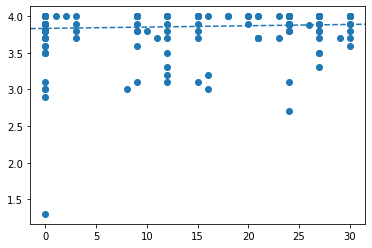

In [284]:
pp.scatter(nice_s5_by_know.index, nice_s5_by_know.S5_mean)
reg = linregress(nice_s5_by_know.index, nice_s5_by_know.S5_mean)
pp.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--")

In [320]:
diff = pd.read_csv('combined_s5_skill_level_diff.csv')

In [321]:
diff

,Unnamed: 0,player_id,weeks,S5_mean,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,Difference_s_5,Diff_skill_know,Diff_skill_priority,Diff_skill_people,Diff_skill_refusal,Diff_skill_me
0,0,6427001,0,3.900,0,0,0,0,6,0.000,0,0,0,0,0
1,1,6427001,3,3.900,21,27,23,24,27,0.000,21,27,23,24,21
2,2,6427001,6,3.875,30,30,29,26,30,-0.025,9,3,6,2,3
3,3,6427027,0,3.800,0,0,0,0,6,0.000,0,0,0,0,0
4,4,6427027,3,4.000,3,3,6,1,9,0.200,3,3,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,225,6608002,0,4.000,0,0,0,0,6,0.000,0,0,0,0,0
222,226,6608002,3,4.000,19,17,17,24,27,0.000,19,17,17,24,21
223,227,6608002,6,3.900,26,29,27,30,30,-0.100,7,12,10,6,3
224,228,6608002,12,4.000,26,29,27,30,30,0.100,0,0,0,0,0


In [322]:
diff_skill =  diff.Diff_skill_know + diff.Diff_skill_refusal + diff.Diff_skill_priority + diff.Diff_skill_people + diff.Diff_skill_me
diff = pd.concat([diff, pd.DataFrame({'diff_total': diff_skill})], axis=1)
diff

,Unnamed: 0,player_id,weeks,S5_mean,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,Difference_s_5,Diff_skill_know,Diff_skill_priority,Diff_skill_people,Diff_skill_refusal,Diff_skill_me,diff_total
0,0,6427001,0,3.900,0,0,0,0,6,0.000,0,0,0,0,0,0
1,1,6427001,3,3.900,21,27,23,24,27,0.000,21,27,23,24,21,116
2,2,6427001,6,3.875,30,30,29,26,30,-0.025,9,3,6,2,3,23
3,3,6427027,0,3.800,0,0,0,0,6,0.000,0,0,0,0,0,0
4,4,6427027,3,4.000,3,3,6,1,9,0.200,3,3,6,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,225,6608002,0,4.000,0,0,0,0,6,0.000,0,0,0,0,0,0
222,226,6608002,3,4.000,19,17,17,24,27,0.000,19,17,17,24,21,98
223,227,6608002,6,3.900,26,29,27,30,30,-0.100,7,12,10,6,3,38
224,228,6608002,12,4.000,26,29,27,30,30,0.100,0,0,0,0,0,0


In [323]:
diff.set_index('diff_total').sort_index()

,Unnamed: 0,player_id,weeks,S5_mean,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,Difference_s_5,Diff_skill_know,Diff_skill_priority,Diff_skill_people,Diff_skill_refusal,Diff_skill_me
diff_total,,,,,,,,,,,,,,,
-51,31,6427039,0,4.0,0,0,0,0,6,0.0,-7,-12,-11,-9,-12
-1,177,6567003,24,4.0,29,30,29,27,30,0.0,3,0,-1,-3,0
0,0,6427001,0,3.9,0,0,0,0,6,0.0,0,0,0,0,0
0,130,6486039,12,4.0,24,30,25,27,27,0.0,0,0,0,0,0
0,131,6486040,0,4.0,0,0,0,0,6,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,6506008,6,3.9,26,30,27,27,30,-0.1,26,30,27,27,24
135,64,6486001,24,3.7,27,29,26,29,30,-0.3,27,29,26,29,24
138,79,6486005,3,3.5,28,30,29,27,30,0.0,28,30,29,27,24


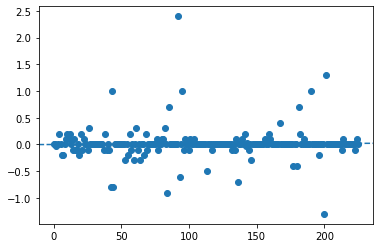

In [327]:
pp.scatter(diff.index , diff.Difference_s_5)
reg = linregress(diff.index, diff.Difference_s_5)
pp.axline(xy1=(0, reg.intercept), slope=reg.slope, linestyle="--")

Text(0, 0.5, 'difference in s5 score')

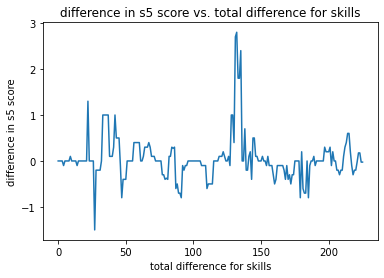

In [336]:
y = np.correlate([1, 1, 1, 1, 1], diff.Difference_s_5, 'same')
pp.plot(diff.index, y)
pp.title('difference in s5 score vs. total difference for skills')
pp.xlabel('total difference for skills')
pp.ylabel('difference in s5 score')

In [379]:
choices = index_by_player.query('event_id == 304 and chunk_id == 1 and piece_id == 0 and aa_level_id == 0').new_choice_id.value_counts()
choices[9.0] = 0
choices[18.0] = 0
choices[19.0] = 0
choices.sort_index()

0.0     53
1.0      7
2.0      8
3.0      6
4.0      9
5.0      2
6.0      2
7.0     44
8.0      1
9.0      0
10.0    32
11.0     3
12.0     2
13.0     6
14.0    28
15.0     8
16.0     5
17.0     3
18.0     0
19.0     0
20.0    36
21.0     5
22.0     6
23.0     2
Name: new_choice_id, dtype: int64

Text(0.5, 1.0, 'bar charts for one word other people would use to describe you')

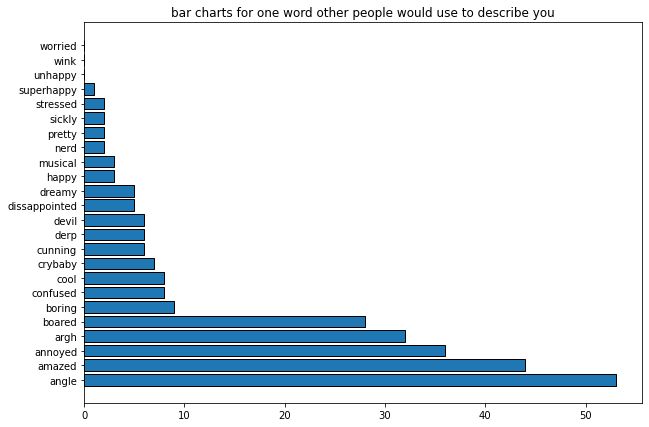

In [401]:
labels = ['angle', 'amazed', 'annoyed', 'argh', 'boared', 'boring', 'confused', 'cool', 'crybaby', 
         'cunning', 'derp', 'devil', 'dissappointed', 'dreamy', 'happy', 'musical', 'nerd', 
         'pretty', 'sickly', 'stressed', 'superhappy', 'unhappy', 'wink', 'worried']
fig = pp.figure(figsize =(10, 7))
pp.barh(labels, choices.values, edgecolor='black')
pp.title('bar charts for one word other people would use to describe you')

In [454]:
one_word = index_by_player.query('event_id == 304 and chunk_id == 1 and piece_id == 0 and aa_level_id	== 0').reset_index()

In [455]:
# increase = 1, decrease = 0
change = []
for i in one_word.player_id.values:
    if i in if_change.player_id.values:
        change.append(if_change.query('player_id == @i').change.values[0])
    else:
        change.append(0)
change

[-1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [456]:
one_word = pd.concat([one_word, pd.DataFrame({'change': change})], axis=1)

In [465]:
one_word = one_word.set_index('new_choice_id').sort_index()

In [469]:
one_word.loc[0]

,player_id,row_id,school,wave,session,date,event_id,event_description,event_category,event_time,event_time_dbl,stack_id,stack_title,data_headers,data_values,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_id,minigame_level,skill_id,old_skill_point,new_skill_point,object_id,object_locked,object_first_time_unlocked,pan_scene_start_left,pan_scene_end_left,scan_start_point,scan_end_point,sense_id,object_scan_result,animatic_id,animatic_time_elapsed,animatic_time_left,avatar_age,avatar_gender,avatar_name,avatar_id,name_of_file,event_type,aa_level_id,chunk_id,piece_id,old_choice_id,old_label,choice_id,new_label,stars_for_this_level_old,stars_for_this_level_new,npc_id,npc_fact_data_type,previous_rank_id,new_rank_id,invitation_id,inviting_npc_id,inviting_npc_rank_id,chosen_response,points_lost_gained,strike,total_points,total_strikes,missed_safe_invitations,accepted_unsafe_invitations,priority_type,card_id,opportunity_card_id,stop_think_id,priority_type_2,resulting_priority_type,priority_protected_true_false,gaining_priority_type,amount_gained,losing_priority_type,amount_lost,goal_1_priority_type,goal1_amount,goal1_achieved_amount,goal_2_priority_type,goal2_amount,goal2_achieved_amount,draws_remaining,starter_statement_id,validity,cred_lost_gained,fact_card_id,chosen_fact_card_id,opponent_its_on_statement_id,players_chosen_response_id,player_won,players_cred_total,item_locked_unlocked_states,proportion_complete,starting_screen_pan_position_x,starting_screen_pan_position_y,starting_screen_pan_position_w,starting_screen_pan_position_h,ending_screen_pan_position_x,ending_screen_pan_position_y,ending_screen_pan_position_w,ending_screen_pan_position_h,real_date_time,json_gamestate_dump,intention_id,answer_validity,influence_id,influence_id1,clip1_validity,influence_id2,clip2_validity,influence_id3,clip3_validity,opponent_attack_id,chosen_opponent_attack_type_id,player_point_loss,strategy_id,strategy_strength,piece_id_2,piece1_id,piece2_id,piece3_id,opponent_point_loss,player_points,opponent_points,old_rating,new_rating,priority_type_that_went_to_zero,epilogue_item_id,item_locked_unlocked_state,change
new_choice_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,6506002,1186766,2238,Summer 2013,Session 1,2013-07-01,304,Player hits save button on aspirational avatar...,AspirationalAvatar,8M 21S,501,NaN,NaN,"AA Level id, Chunk id, Piece id, old Choice id...","0,1,0,-1,,0,very nice",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Session_1_eventLog_6506002.log,Me Power,0.0,1.0,0.0,-1.0,NaN,NaN,very nice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
0.0,6567004,1666072,1531,Single wave,Session 2,2013-10-18,304,Player hits save button on aspirational avatar...,AspirationalAvatar,7M 26S,446,NaN,NaN,"AA Level id, Chunk id, Piece id, old Choice id...","0,1,0,-1,,0,happy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Session_2_eventLog_6567004.log,Me Power,0.0,1.0,0.0,-1.0,NaN,NaN,happy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
0.0,6427024,224636,3561,3561 Summer 2013 - Group 1,Session 1,2013-07-08,304,Player hits save button on aspirational avatar...,AspirationalAvatar,1H 4M 15S,3855,NaN,NaN,"AA Level id, Chunk id, Piece id, old Choice id...","0

In [479]:
incre = []
decre = []
for i in range(0, 24):
    if (i not in one_word.index):
        incre.append(0)
        decre.append(0)
    else:
        incre.append(len(one_word.loc[0].query('change == 1')))
        decre.append(len(one_word.loc[0].query('change == -1')))

In [480]:
print(incre)
print(decre)

[6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3]


In [ ]:
index_by_player.query('e')